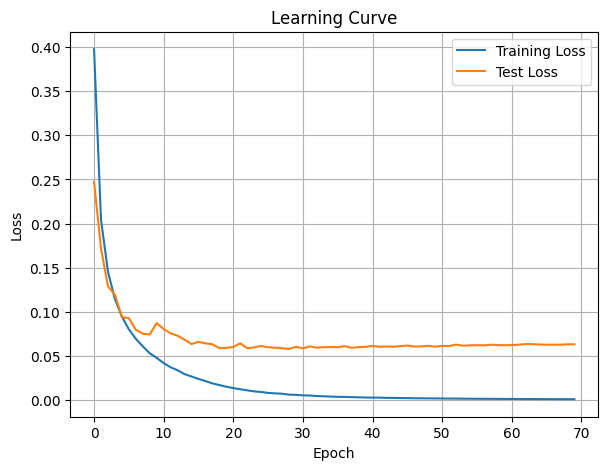

In [12]:

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
input_size = 28 * 28
hidden_size = 300
output_size = 10
model = NeuralNetwork(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_loader = torch.utils.data.DataLoader(datasets.MNIST('./data', train=True, download=True, transform=transform), batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST('./data', train=False, download=True, transform=transform), batch_size=1000, shuffle=False)

num_epochs = 70


for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.view(data.size(0), -1)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted_train = torch.max(output, 1)
        total_train += target.size(0)
        correct_train += (predicted_train == target).sum().item()
    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.view(data.size(0), -1)
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()
            _, predicted_test = torch.max(output, 1)
            total_test += target.size(0)
            correct_test += (predicted_test == target).sum().item()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        test_accuracy = 100 * correct_test / total_test
        test_accuracies.append(test_accuracy)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.grid()
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.show()

 